## Analyzing AWS Palace results (flux through a qubit SQUID loop) with [scQubits](https://scqubits.readthedocs.io/en/latest/)

In [1]:
import scqubits as scq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## read in the flux data ##
phi_df = pd.read_csv("magneto_output/surface-F.csv",usecols = [1])
phi_df.columns = ["flux"]

## read in the current data ##
current_df = pd.read_csv("magneto_output/terminal-I.csv",usecols = [1])
current_df.columns = ["current"]

In [3]:
# divide the flux through our SQUID loop by the terminal current to get flux per unit current [weber / ampere]
dphi_dI = phi_df.flux.to_numpy() / current_df.current.to_numpy() 

## convert to units of flux quantum ## 
phi0 = 2.0678338484619295e-15 
norm_dphi_dI = abs(dphi_dI/phi0) # normalize

## current through flux line ###
current = np.linspace(0,20*10**(-3),25)

In [4]:
## SQUID loop parameters for scqubits ##
junction_asymmetry = .01
EJmax = 50
EC=.5

## Analyzing the flux tunability of our qubit

In [5]:
frequencies = []
for I in current:
    flux = I * norm_dphi_dI
    qubit = scq.TunableTransmon(EJmax=EJmax,
                                         EC=EC,
                                         d=junction_asymmetry,
                                         flux=flux,
                                         ng=0.0,
                                         ncut=30
                                        )
    frequencies.append(qubit.E01())
    
frequencies = np.array(frequencies)
deltaf = frequencies - frequencies.max()

### Qubit Frequency vs Flux Bias Line Current

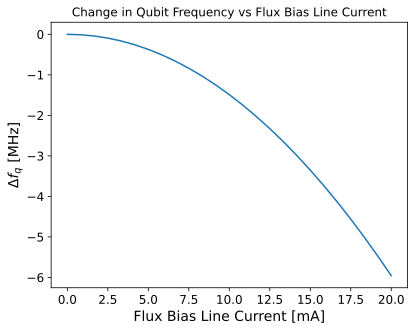

In [6]:
fig,ax = plt.subplots()
plt.plot(current*1000,deltaf*10**3)

plt.xlabel("Flux Bias Line Current [mA]",fontsize = 14)
plt.ylabel(r"$\Delta f_q$ [MHz]",fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Change in Qubit Frequency vs Flux Bias Line Current")
plt.savefig("Figures/deltaf_vs_current.png")

### Qubit Frequency vs $\frac{\Phi}{\Phi_0}$

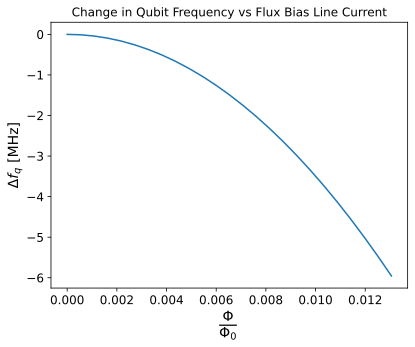

In [7]:
phi_over_phi0 = current * norm_dphi_dI
plt.plot(phi_over_phi0,deltaf*10**3)

plt.xlabel(r"$\frac{\Phi}{\Phi_0}$",fontsize = 20)
plt.ylabel(r"$\Delta f_q$ [MHz]",fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Change in Qubit Frequency vs Flux Bias Line Current")
plt.savefig("Figures/deltaf_vs_phi.png")

### Coherence metrics as a function of flux

Spectral data:   0%|          | 0/25 [00:00<?, ?it/s]

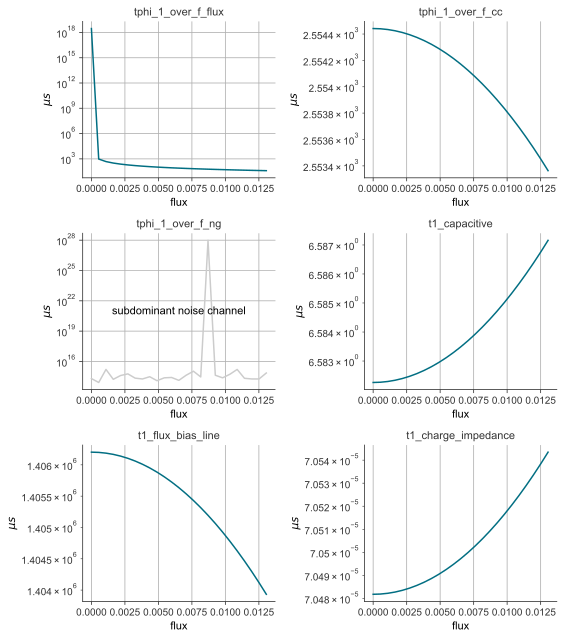

In [9]:
qubit = scq.TunableTransmon(EJmax=EJmax,
                                     EC=EC,
                                     d=junction_asymmetry,
                                     flux=0,
                                     ng=0.0,
                                     ncut=30
                                    )

qubit.plot_coherence_vs_paramvals(param_name = 'flux',
                                  param_vals = current * norm_dphi_dI,
                                  scale=1e-3,
                                  ylabel=r"$\mu s$");